In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import MicroTools as mt
# from kjkutils import *

MiniBooNE_Signal_PANM_True = np.loadtxt(f"MicroTools/MB_data/MB_osc_tables/dm-MB-events-table-TrueEnu.dat")

(501, 14)
()


In [3]:
mt.mb_mc_data_release

array([[  1202.76    ,   1118.64    ,  51884.7     , 212915.185635],
       [  1371.7052  ,   1347.682   ,  50860.715   , 212915.185635],
       [   597.33599 ,   1031.641   ,  53322.56    , 258645.461796],
       ...,
       [  1109.3978  ,   1633.3373  ,  50574.088   , 212915.185635],
       [   931.30636 ,    994.44062 ,  53443.652   , 212915.185635],
       [  1881.1988  ,   2251.5848  ,  51996.619   , 253439.378452]])

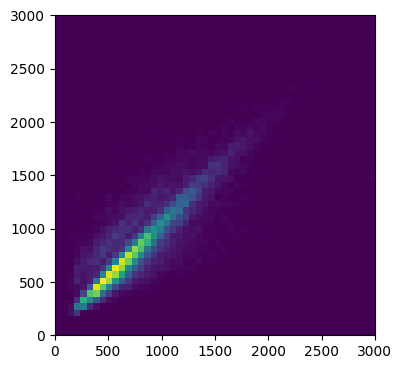

In [4]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
_ = ax.hist2d(mt.mb_mc_data_release[:,0], mt.mb_mc_data_release[:,1], bins=[np.linspace(0,3000,51), np.linspace(0,3000,51)], weights=mt.mb_mc_data_release[:,-1])

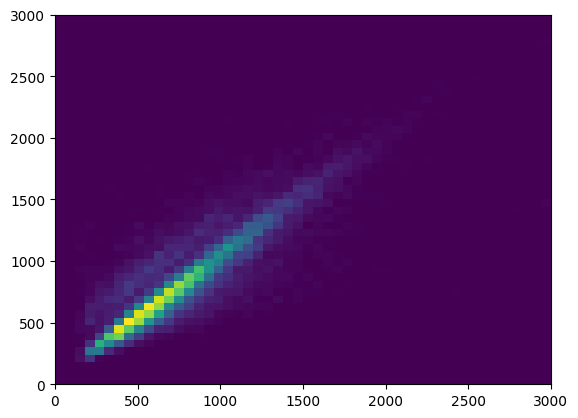

In [5]:
_ = plt.hist2d(mt.mb_mc_data_release[:,0], mt.mb_mc_data_release[:,1], bins=[np.linspace(0,3000,51), np.linspace(0,3000,51)], weights=mt.mb_mc_data_release[:,-1])

In [6]:
MB_True_Bins = [0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000]
bin_centers = np.array(MB_True_Bins[:-1]) + np.diff(MB_True_Bins)/2.
#MB_True_Bins = np.loadtxt('/Users/kjkelly/Dropbox/ResearchProjects/Retired/JK_PANM_2p2h/2p2h/jk/mb-data/nue/miniboone_binboundaries_nue_lowe.txt')/1000

In [7]:
#determine bin width for an energy in a certain bin
def bw(energy):
    if energy < 0.200 or energy > 3.000:
        return 1.0
    bin_width = np.diff(MB_True_Bins)[np.digitize(energy, MB_True_Bins)-1]
    return bin_width

In [8]:
dm0 = MiniBooNE_Signal_PANM_True[0][0]

In [9]:
mb_data = np.array([732.0,  426.0,  444.0,  248.0,  281.0,  236.0,  201.0,  164.0,  138.0,  144.0,  188.0])
mb_bkg = np.array([527.164624,  315.423689,  349.644825,  186.211970,  261.441799,  195.534193,  203.008745,  165.664396,  118.581365, 143.989367,  201.450357])
# mb_coarse_bins = np.loadtxt('/Users/kjkelly/Dropbox/ResearchProjects/Retired/JK_PANM_2p2h/2p2h/jk/mb-data/nue/miniboone_binboundaries_nue_lowe.txt')/1000
mb_coarse_bins = mt.bin_edges/1e3
mb_coarse_binwidths = np.diff(mb_coarse_bins)
mb_coarse_bincenters = mb_coarse_bins[:-1] + mb_coarse_binwidths/2.

In [10]:
#dm0 = MiniBooNE_Signal_PANM_True[300][0]
dm0 = 0.043
new_weights = np.array([mbi[3]*np.sin(1.267*dm0*((mbi[2]/100)/(mbi[1])))**2 for mbi in mt.mb_mc_data_release])

(0.0, 3.0)

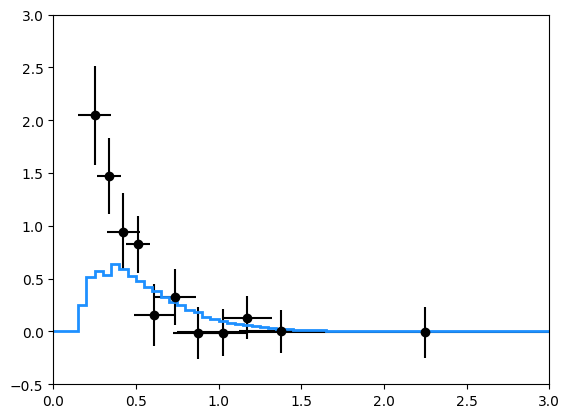

In [11]:
plt.errorbar(mb_coarse_bincenters, (mb_data - mb_bkg)/(1000*mb_coarse_binwidths), yerr=np.sqrt(0.0003*np.abs(mb_data)), xerr=mb_coarse_binwidths, fmt='o', color='k', label='MiniBooNE Data')
#plt.hist(mb_coarse_bincenters, weights=(mb_data - mb_bkg)/(1000*mb_coarse_binwidths), bins=mb_coarse_bins, histtype='step', color='k', label='MiniBooNE Data')
plt.gca().axis([0,3,-0.5,3])
plt.hist(np.transpose(mt.mb_mc_data_release)[0]/1000, weights=10e-7*new_weights, bins=np.linspace(0, 3, 61), histtype='step', lw=2, color='dodgerblue', density=False)
plt.gca().set_xlim(0.0, 3.0)

(0.0, 3.0)

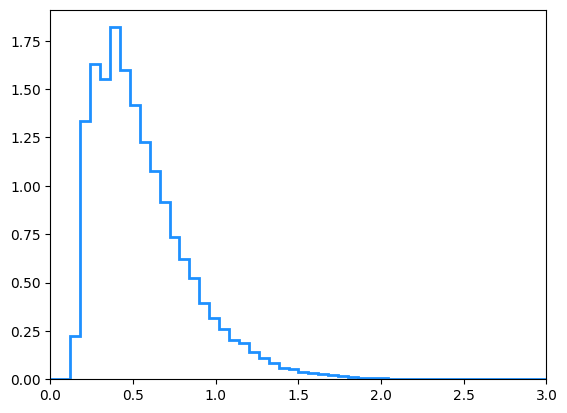

In [12]:
#plt.hist(np.transpose(mb_release_mc)[0]/1000, weights=np.transpose(mb_release_mc)[-1]/bws, bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue')
#plt.gca().set_xlim(0.2, 2.0)
plt.hist(np.transpose(mt.mb_mc_data_release)[0]/1000, weights=new_weights, bins=np.linspace(0, 3, 51), histtype='step', lw=2, color='dodgerblue', density=True)
plt.gca().set_xlim(0.0, 3.0)

In [13]:
dm0 = MiniBooNE_Signal_PANM_True[300][0]
new_weights = np.array([mbi[3]*np.sin(1.267*dm0*((mbi[2]/100)/(mbi[1])))**2 for mbi in mt.mb_mc_data_release])

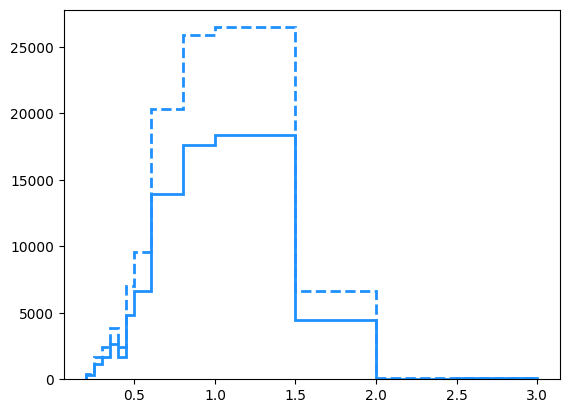

In [20]:
plt.hist(np.transpose(mt.mb_mc_data_release)[1]/1000, weights=4e-5*new_weights, bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue')

#dm0 = MiniBooNE_Signal_PANM_True[0][0]
#wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
_=plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[300][1:], bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue', ls='--')

In [21]:
LMBT = 0.4685 #Baseline length in kilometers
from scipy.special import sici, expi

def ssqAvg(Emin, Emax, L, dmsq):
    if Emin == 0.0:
        Emin = 0.000001
    xmin, xmax = Emin/(1.267*dmsq*L), Emax/(1.267*dmsq*L)
    return 1.267*dmsq*L/(Emax-Emin)*((xmax*np.sin(1.0/xmax)**2 - sici(2.0/xmax)[0]) - (xmin*np.sin(1.0/xmin)**2 - sici(2.0/xmin)[0]))

def expdecayAvg(Emin, Emax, L, gm):
    if Emin == 0.0:
        Emin = 0.000001
    xmin, xmax = (16*np.pi/((1.267*gm**2)*L))*Emin, (16*np.pi/((1.267*gm**2)*L))*Emax
    return 1/(Emax-Emin)*((Emax-Emin) - Emax*np.exp(-1/xmax) + Emin*np.exp(-1/xmin) - (1.267*gm**2)*L/(16*np.pi)*(expi(-1/xmax) - expi(-1/xmin)))

In [22]:
dm0 = MiniBooNE_Signal_PANM_True[0][0]
np.array([expdecayAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0)/ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])

array([0.0074805 , 0.00916729, 0.01085068, 0.01253203, 0.01421206,
       0.01589119, 0.01833243, 0.02314081, 0.02991538, 0.04076825,
       0.05785083, 0.07478753, 0.09165872])

(array([ 3893.07668045,  5255.95231245,  6258.7949923 ,  8892.29927048,
        10239.57539261, 10632.23500968, 23111.69717248, 46430.98292311,
        37527.05945139, 48432.25620384, 11219.77710075,  1390.03486365,
          359.35706235]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x1194e1a30>])

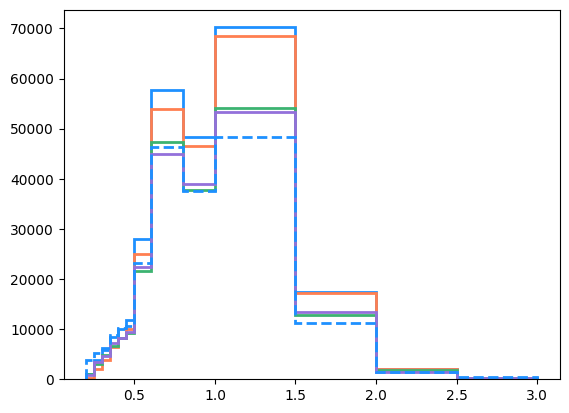

In [23]:
dm0 = MiniBooNE_Signal_PANM_True[0][0]
wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[0][1:]/wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue')

dm0 = MiniBooNE_Signal_PANM_True[200][0]
wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[200][1:]/wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='coral')

dm0 = MiniBooNE_Signal_PANM_True[400][0]
wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[400][1:]/wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='mediumseagreen')

dm0 = MiniBooNE_Signal_PANM_True[500][0]
wgt_adjust = np.array([ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[500][1:]/wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='mediumpurple')

plt.hist(np.transpose(mt.mb_mc_data_release)[0]/1000, weights=6e-5*np.transpose(mt.mb_mc_data_release)[-1], bins=MB_True_Bins, histtype='step', color='dodgerblue', ls='--', lw=2)

(array([0.09676282, 0.30346265, 0.46201402, 0.65008211, 0.77583172,
        0.8523693 , 1.06171427, 1.11846805, 0.9036489 , 0.51595251,
        0.12976906, 0.01617118, 0.00286536]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x11955d790>])

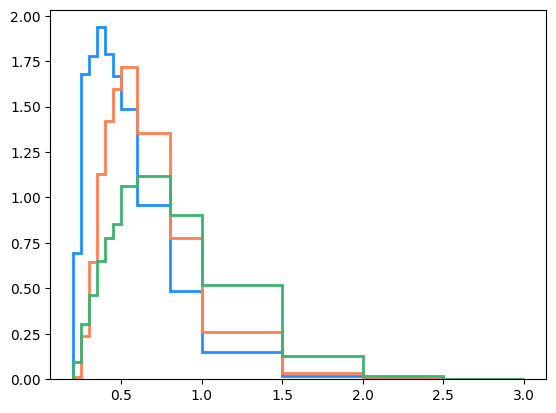

In [24]:
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[0][1:], bins=MB_True_Bins, histtype='step', density=True, lw=2, color='dodgerblue')
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[200][1:], bins=MB_True_Bins, histtype='step', density=True, lw=2, color='coral')
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[400][1:], bins=MB_True_Bins, histtype='step', density=True, lw=2, color='mediumseagreen')

(array([9.02844905e+02, 2.78139658e+03, 4.84255171e+03, 1.21051158e+04,
        2.93565066e+03, 4.74950463e+04, 1.17684285e+04, 2.97795067e+04,
        8.10994288e+04, 2.19805528e+04, 2.37672354e+04, 1.33158689e+02,
        5.53296717e+01]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x1195e11c0>])

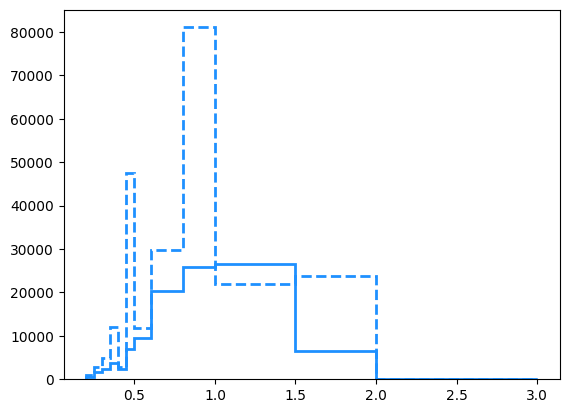

In [25]:
dm0 = MiniBooNE_Signal_PANM_True[300][0]
wgt_adjust = np.array([expdecayAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0)/ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[300][1:], bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue')
plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[300][1:]*wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='dodgerblue', ls='--')

#dm0 = MiniBooNE_Signal_PANM_True[200][0]
#wgt_adjust = np.array([expdecayAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0)/ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
#plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[200][1:]*wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='coral')

#dm0 = MiniBooNE_Signal_PANM_True[400][0]
#wgt_adjust = np.array([expdecayAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0)/ssqAvg(MB_True_Bins[i], MB_True_Bins[i+1], LMBT, dm0) for i in range(len(MB_True_Bins)-1)])
#plt.hist(bin_centers, weights=MiniBooNE_Signal_PANM_True[400][1:]*wgt_adjust, bins=MB_True_Bins, histtype='step', lw=2, color='mediumseagreen')

